In [1]:
import torch
from torch import utils
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_svhn(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [3]:
path='./SVHN_data'

In [26]:
svhn = datasets.SVHN(path, download=True, transform=transforms.ToTensor())
channel = []
train_mean = [0,0,0]
train_std = [0,0,0]

for c in range(3):
    print ("Processing channel", c)
    channel = [svhn[i][0][c] for i in range(len(svhn))]
    stacked = torch.stack(channel)
    train_mean[c] = stacked.mean() 
    train_std[c] = stacked.std()
    print (" elements:", len(channel))
    channel = []
    stacked = None
    
svhn_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((train_mean), (train_std)),
           ])


Using downloaded and verified file: ./SVHN_data/train_32x32.mat
Processing channel 0
 elements: 73257
Processing channel 1
 elements: 73257
Processing channel 2
 elements: 73257


In [27]:
print (train_mean)
print (train_std)

[tensor(0.4377), tensor(0.4438), tensor(0.4728)]
[tensor(0.1980), tensor(0.2010), tensor(0.1970)]


In [28]:
train_data = datasets.SVHN(path, download=True, transform=svhn_transform)
test_data = datasets.SVHN(path, download=True, transform=svhn_transform)

Using downloaded and verified file: ./SVHN_data/train_32x32.mat
Using downloaded and verified file: ./SVHN_data/train_32x32.mat


In [29]:
train_data[0][0]

tensor([[[-1.5567, -1.9131, -1.9131,  ..., -0.7844, -0.5863, -0.4477],
         [-1.6557, -1.9329, -1.9329,  ..., -1.4181, -0.8834, -0.5665],
         [-1.4181, -1.8537, -1.8933,  ..., -1.7547, -1.5171, -0.7844],
         ...,
         [-0.5071, -0.4873, -0.5863,  ..., -0.1507, -0.1507, -0.1705],
         [-0.5467, -0.5071, -0.5863,  ..., -0.0319, -0.1111, -0.1111],
         [-0.5269, -0.4477, -0.5269,  ..., -0.0121, -0.0517, -0.1705]],

        [[-1.6224, -1.7589, -1.8760,  ..., -0.9396, -0.7055, -0.6664],
         [-1.4468, -1.7199, -1.8175,  ..., -1.4468, -1.0761, -0.6860],
         [-1.4078, -1.7980, -1.8760,  ..., -1.6419, -1.3883, -0.8615],
         ...,
         [-0.6274, -0.6079, -0.6664,  ..., -0.1787, -0.1592, -0.1592],
         [-0.5299, -0.6664, -0.7250,  ..., -0.1982, -0.1592, -0.1787],
         [-0.4909, -0.6079, -0.6664,  ..., -0.1787, -0.1592, -0.1397]],

        [[-1.6433, -2.0214, -2.0214,  ..., -1.2850, -1.2651, -1.2253],
         [-1.7030, -1.9617, -2.0612,  ..., -1

In [30]:
images = [train_data[i][0] for i in range(50)]

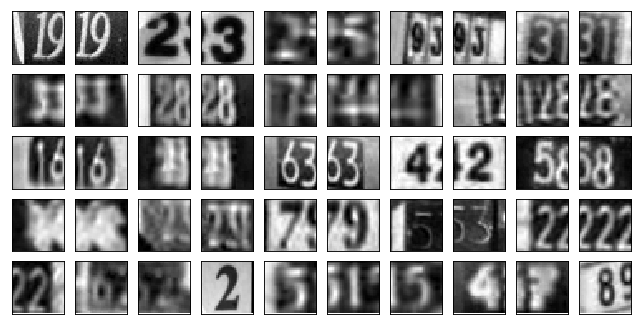

In [31]:
plot_svhn(images, (5, 10))

In [32]:
images[0][0].shape

torch.Size([32, 32])

In [33]:
train_loader = utils.data.DataLoader(train_data, batch_size=50, shuffle=True)

In [34]:
batch_x, batch_y = next(iter(train_loader))

In [35]:
batch_x.shape

torch.Size([50, 3, 32, 32])

In [36]:
batch_y

tensor([ 7,  7,  4,  1,  5,  4,  2,  6,  4,  3,  3,  9,  2,  6,
         3,  3,  4,  9,  1,  3,  6,  1,  9,  0,  1,  6,  6,  6,
         4,  9,  3,  2,  3,  7,  3,  2,  6,  4,  5,  1,  7,  3,
         6,  4,  5,  8,  3,  2,  6,  9])